# 5.3. Multiclass Classification with Fashin MNIST Dataset
* "시작하세요! 텐서플로우 2.0 프로그래밍", 5.3. Fashion MNIST

## Dataset
### MNIST Dataset
* THE MNIST DATABASE of handwritten digits, http://yann.lecun.com/exdb/mnist/
* Sample images from MNIST test dataset, Wikipedia

<img src='images/sample_images_from_mnist_test_dataset.png' align='left'>




### Fashion MNIST Dataset
* is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms.
* shares the same image size and structure of training and testing splits.
* Each example is a 28x28 grayscale image, associated with a label from 10 classes.
* A dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples.
* 상세한 내용은 아래 내용을 참고.
  * [fashion-mnist](https://github.com/zalandoresearch/fashion-mnist) by [zalandoresearch](https://github.com/zalandoresearch)
  * [Fashion MNIST](https://www.kaggle.com/zalando-research/fashionmnist) by [Kaggle](https://www.kaggle.com/)
  * [Basic classification: Classify images of clothing](https://www.tensorflow.org/tutorials/keras/classification) by [TensorFlow](https://www.tensorflow.org/)
  * [첫 번째 신경망 훈련하기: 기초적인 분류 문제](https://www.tensorflow.org/tutorials/keras/classification) by [TensorFlow](https://www.tensorflow.org/) (한국어 설명)

<img src='images/fashion-mnist-sprite.png' align='left'>

| Label  | Class       |
|--------|-------------|
| 0      | T-shirt/top |
| 1      | Trouser     |
| 2      | Pullover    |
| 3      | Dress       |
| 4      | Coat        |
| 5      | Sandal      |
| 6      | Shirt       |
| 7      | Sneaker     |
| 8      | Bag         |
| 9      | Ankle boot  |

In [16]:
label2class = [ 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 함수 정의

In [9]:
def show_an_image( numpy_ndarray, cmap=None ):
  # Fashion MNIST Dataset
  import matplotlib.pyplot as plt

  plt.imshow( numpy_ndarray, cmap )
  plt.colorbar()
  plt.show()

## 데이터 수집
tf.keras에 Fashion MNIST dataset이 준비되어 있으므로 간단히 불러와서 사용할 수 있습니다.

In [2]:
import tensorflow as tf

In [3]:
fashion_mnist_module = tf.keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist_module.load_data()

In [7]:
len( train_x ), len( test_x )

(60000, 10000)

훈련 데이터 6만장, 테스트 데이터 1만장이 준비되어 있습니다.

## Data Sample 확인

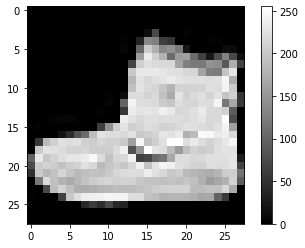

In [10]:
show_an_image( train_x[0], cmap='gray' )

In [17]:
train_y[0], label2class[ train_y[0] ]

(9, 'Ankle boot')

각 이미지는 크기가 28x28픽셀인 2차원 행렬값 입니다.

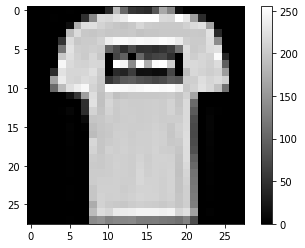

In [11]:
show_an_image( train_x[1], cmap='gray' )

In [19]:
[train_y[1], label2class[ train_y[1]] ]

[0, 'T-shirt/top']

## 데이터 준비

### 데이터 정규화 (Normalize dataset)
픽셀의 최대값이 255.0, 최소값이 0.0 이라는 것을 알고 있으므로...

In [24]:
train_x = train_x / 255.0
test_x = test_x / 255.0

One-hot encoding해서 Sparse matrix를 만드는 대신
> train_y = tf.keras.utils_to_categorical( train_y, num_classes=10 )

> test_y = tf.keras.utils_to_categorical( test_y, num_classes=10 )

model.compil의 loss를 'categorical_crossentropy' 대신 'sparse_categorical_crossentropy'를 씁니다.

## 모델 생성

In [27]:
model = tf.keras.Sequential( [
    tf.keras.layers.Flatten( input_shape=(28,28) ),
    tf.keras.layers.Dense( units=128, activation='relu' ),
    tf.keras.layers.Dense( units=10, activation='softmax' )
])
model.compile( optimizer=tf.keras.optimizers.Adam(),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'] )
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 모델 훈련

In [28]:
history = model.fit( train_x, train_y, epochs=25, validation_split=0.25 )

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 4s 81us/sample - loss: 0.5265 - accuracy: 0.8172 - val_loss: 0.4392 - val_accuracy: 0.8420
Epoch 2/25
45000/45000 [==============================] - 3s 74us/sample - loss: 0.3977 - accuracy: 0.8562 - val_loss: 0.3842 - val_accuracy: 0.8606
Epoch 3/25
45000/45000 [==============================] - 3s 72us/sample - loss: 0.3535 - accuracy: 0.8716 - val_loss: 0.3794 - val_accuracy: 0.8611
Epoch 4/25
45000/45000 [==============================] - 3s 74us/sample - loss: 0.3269 - accuracy: 0.8810 - val_loss: 0.3327 - val_accuracy: 0.8801
Epoch 5/25
45000/45000 [==============================] - 3s 73us/sample - loss: 0.3027 - accuracy: 0.8897 - val_loss: 0.3528 - val_accuracy: 0.8721
Epoch 6/25
45000/45000 [==============================] - 3s 74us/sample - loss: 0.2899 - accuracy: 0.8938 - val_loss: 0.3366 - val_accuracy: 0.8794
Epoch 7/25
45000/45000 [==============================] 

## 학습 과정 시각화


In [29]:
def plot_learning_curve( history ):

    import matplotlib.pyplot as plt
    plt.figure( figsize=(12,4) )

    plt.subplot( 1,2,1 )
    plt.plot( history.history['loss'], 'b-', label='loss' )
    plt.plot( history.history['val_loss'], 'r--', label='val_loss' )
    plt.xlabel( 'Epoch' )
    plt.legend()

    plt.subplot( 1, 2, 2 )
    plt.plot( history.history['accuracy'], 'g-', label='accuracy' )
    plt.plot( history.history['val_accuracy'], 'k--', label='val_accuracy' )
    plt.xlabel( 'Epoch' )
    plt.ylim( 0.7, 1 )
    plt.legend()

    plt.show()

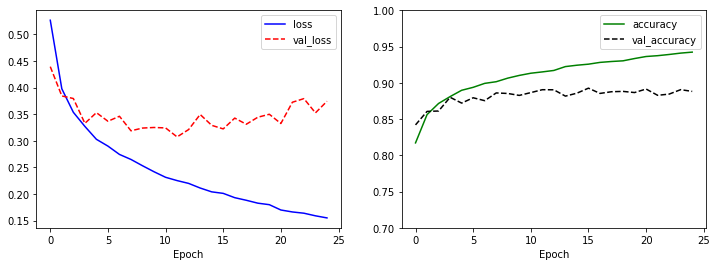

In [30]:
plot_learning_curve( history )

### 과적합 현상 발생
검증 데이터의 손실 (val_loss)가 감소하다가 10 epoch 이후로 서서히 증가합니다. 과적합을 막기 위해서 학습을 중간에 끝낸 시점의 모델을 이용하면 됩니다.

> tf.keras.callbacks.EarlyStopping을 사용

In [33]:
model.evaluate( test_x, test_y )

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[86.9160070137024, 0.8643]

# 테스트 평가 정확도
86.43%가 나왔습니다. 네트워크 구조를 변경, 다른 학습 알고리즘 사용 등 변화를 줘서 정확도를 높일 수 있습니다.